In [26]:
from langgraph.graph import StateGraph,START,END
from langchain_mistralai import ChatMistralAI
from typing import TypedDict
from dotenv import load_dotenv


In [27]:
load_dotenv()

llm = ChatMistralAI()

In [28]:
class LLMstate(TypedDict):
    title:str
    outline:str
    content:str

In [29]:
def create_outline(state: LLMstate)->LLMstate:
    title = state['title']

    prompt = f'create a outline for a blog for the title : {title}'

    result = llm.invoke(prompt).content

    state['outline']=result

    return state

In [30]:
def create_blog(state : LLMstate)->LLMstate:
    title = state['title']
    outline = state['outline']

    prompt = f'create a blog for the title : {title} using the following outline: {outline}'

    state['content'] = llm.invoke(prompt).content

    return state

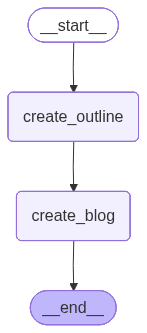

In [31]:
graph = StateGraph(LLMstate)

graph.add_node("create_outline",create_outline)
graph.add_node("create_blog",create_blog)

graph.add_edge(START,"create_outline")
graph.add_edge("create_outline","create_blog")
graph.add_edge("create_blog",END)

workflow = graph.compile()

graph.compile()

In [33]:
inital_state = {'title':'forigen policy of india'}

final_state = workflow.invoke(inital_state)

print(final_state['content'])

# **Foreign Policy of India: Principles, Priorities, and Challenges**

## **Introduction**
India’s foreign policy has evolved significantly since independence, reflecting its aspirations as a rising global power. Rooted in principles of non-alignment and strategic autonomy, India’s diplomatic approach balances national security, economic growth, and regional stability. From the **Panchsheel Principles** of the 1950s to the **Modi Doctrine** of proactive diplomacy, India has navigated complex geopolitical challenges while asserting its influence in multilateral forums.

Today, India’s foreign policy is shaped by its **neighborhood-first approach**, **strategic partnerships**, and **economic diplomacy**. However, it faces challenges from **China’s assertiveness, Pakistan’s hostility, and global power shifts**. This blog explores the **foundations, priorities, challenges, and future trajectory** of India’s foreign policy.

---

## **Foundations of India’s Foreign Policy**
India’s foreign 

In [34]:
final_state['outline']

'Certainly! Below is a structured **outline** for a blog post titled **"Foreign Policy of India: Principles, Priorities, and Challenges."**\n\n---\n\n### **Title: Foreign Policy of India: Principles, Priorities, and Challenges**\n\n#### **1. Introduction**\n   - Brief overview of India’s foreign policy evolution.\n   - Importance of foreign policy in shaping India’s global standing.\n   - Key objectives: National security, economic growth, and strategic autonomy.\n\n#### **2. Foundations of India’s Foreign Policy**\n   - **Panchsheel Principles (1954)** – Non-alignment, peaceful coexistence.\n   - **Non-Aligned Movement (NAM)** – Historical significance.\n   - **Vajpayee Doctrine** – No-first-use nuclear policy.\n   - **Modi Doctrine** – Proactive diplomacy, neighborhood-first policy.\n\n#### **3. Key Priorities in India’s Foreign Policy**\n   - **Neighborhood First Policy** – Relations with Pakistan, China, Nepal, Bangladesh, Sri Lanka.\n   - **Act East Policy** – Strengthening ties w